# Preprocesamiento

In [1]:
import torch

tensor = torch.rand(3,3)

print(torch.cuda.is_available)

print(tensor)

<function is_available at 0x00000159FE684220>
tensor([[0.6821, 0.0952, 0.9746],
        [0.5963, 0.3491, 0.4963],
        [0.4290, 0.1679, 0.8348]])


In [1]:
pip install torch torchvision face_recognition opencv-python tqdm

  Using cached face_recognition-1.3.0-py2.py3-none-any.whl.metadata (21 kB)
  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached face_recognition_models-0.3.0-py2.py3-none-any.whl
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
Using cached face_recognition-1.3.0-py2.py3-none-any.whl (15 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Using cached click-8.1.8-py3-none-any.whl (98 kB)

   ---------------------------------------- 0/5 [face-recognition-models]
   ---------------------------------------- 0/5 [face-recognition-models]
   -------- ------------------------------- 1/5 [tqdm]
   -------- ------------------------------- 1/5 [tqdm]
   ---------------- ----------------------- 2/5 [opencv-python]
   ---------------- ----------------------- 2/5 [opencv-python]
   ---------------- ------------

In [2]:
import os
import cv2
import torch
import face_recognition
import numpy as np
from pathlib import Path
from tqdm import tqdm
from torchvision import transforms
import random

In [1]:
def preprocess_ffpp_videos(
    base_path, output_path,
    folders=['original'],
    sequence_length=16,
    min_faces=10,
    size=224,
    max_videos=1000
):
    base_path = Path(base_path)
    output_path = Path(output_path)
    output_path.mkdir(parents=True, exist_ok=True)

    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((size, size)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

    for folder in folders:
        folder_path = base_path / folder
        all_videos = list(folder_path.glob("*.mp4"))
        selected_videos = random.sample(all_videos, min(len(all_videos), max_videos))

        for video_path in tqdm(selected_videos, desc=f"Procesando {folder}"):
            # 🔒 Verifica si el tensor ya existe
            out_name = output_path / f"{folder}_{video_path.stem}.pt"
            if out_name.exists():
                print(f"⏭️ Saltando {video_path.name} (ya procesado)")
                continue

            cap = cv2.VideoCapture(str(video_path))
            total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            indices = np.linspace(0, total_frames - 1, sequence_length, dtype=int)

            frames = []
            for idx in indices:
                cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
                ret, frame = cap.read()
                if not ret:
                    continue
                rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                boxes = face_recognition.face_locations(rgb)
                if boxes:
                    top, right, bottom, left = boxes[0]
                    face = rgb[top:bottom, left:right]
                    if face.size != 0:
                        tensor_face = transform(face)
                        frames.append(tensor_face)

            cap.release()

            if len(frames) < min_faces:
                print(f"⚠️ Ignorado: {video_path.name} ({len(frames)} rostros)")
                continue

            while len(frames) < sequence_length:
                frames.append(frames[-1].clone())

            video_tensor = torch.stack(frames)
            torch.save(video_tensor, out_name)
            print(f"✅ Guardado: {out_name}")


In [3]:
preprocess_ffpp_videos(
    base_path="C:/Users/Hermanos/Desktop/Proyecto Deepfake/FaceForensics++_C23",
    output_path="C:/Users/Hermanos/Desktop/Proyecto Deepfake/preprocesados",
    max_videos=1000  # límite por carpeta
)

Procesando original:   0%|          | 0/1000 [00:00<?, ?it/s]

⏭️ Saltando 342.mp4 (ya procesado)


Procesando original:   0%|          | 2/1000 [00:07<1:05:27,  3.94s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_621.pt


Procesando original:   0%|          | 3/1000 [00:10<59:41,  3.59s/it]  

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_937.pt


Procesando original:   0%|          | 4/1000 [00:13<55:08,  3.32s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_699.pt


Procesando original:   0%|          | 5/1000 [00:17<58:07,  3.51s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_141.pt


Procesando original:   1%|          | 6/1000 [00:25<1:22:55,  5.01s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_580.pt


Procesando original:   1%|          | 7/1000 [00:29<1:17:27,  4.68s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_347.pt


Procesando original:   1%|          | 8/1000 [00:38<1:37:35,  5.90s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_325.pt
⏭️ Saltando 480.mp4 (ya procesado)


Procesando original:   1%|          | 10/1000 [00:41<1:03:39,  3.86s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_903.pt


Procesando original:   1%|          | 11/1000 [00:49<1:22:06,  4.98s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_641.pt


Procesando original:   1%|          | 12/1000 [00:57<1:35:38,  5.81s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_639.pt
⏭️ Saltando 899.mp4 (ya procesado)


Procesando original:   1%|▏         | 14/1000 [01:00<1:05:12,  3.97s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_486.pt


Procesando original:   2%|▏         | 15/1000 [01:09<1:21:01,  4.94s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_748.pt


Procesando original:   2%|▏         | 16/1000 [01:12<1:13:19,  4.47s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_413.pt


Procesando original:   2%|▏         | 17/1000 [01:20<1:28:38,  5.41s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_199.pt


Procesando original:   2%|▏         | 18/1000 [01:23<1:18:29,  4.80s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_216.pt
⏭️ Saltando 579.mp4 (ya procesado)


Procesando original:   2%|▏         | 20/1000 [01:26<55:12,  3.38s/it]  

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_887.pt


Procesando original:   2%|▏         | 21/1000 [01:44<1:50:36,  6.78s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_753.pt
⏭️ Saltando 678.mp4 (ya procesado)


Procesando original:   2%|▏         | 23/1000 [01:46<1:15:01,  4.61s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_987.pt


Procesando original:   2%|▏         | 24/1000 [02:04<2:01:57,  7.50s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_397.pt


Procesando original:   2%|▎         | 25/1000 [02:12<2:04:20,  7.65s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_942.pt
⏭️ Saltando 747.mp4 (ya procesado)


Procesando original:   3%|▎         | 27/1000 [02:20<1:39:44,  6.15s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_453.pt


Procesando original:   3%|▎         | 28/1000 [02:28<1:46:18,  6.56s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_031.pt


Procesando original:   3%|▎         | 29/1000 [02:31<1:32:24,  5.71s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_840.pt


Procesando original:   3%|▎         | 30/1000 [02:34<1:21:14,  5.03s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_727.pt


Procesando original:   3%|▎         | 31/1000 [02:37<1:13:01,  4.52s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_642.pt


Procesando original:   3%|▎         | 32/1000 [02:40<1:06:18,  4.11s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_728.pt


Procesando original:   3%|▎         | 33/1000 [02:44<1:02:07,  3.85s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_130.pt


Procesando original:   3%|▎         | 34/1000 [02:46<57:51,  3.59s/it]  

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_913.pt
⏭️ Saltando 066.mp4 (ya procesado)
⏭️ Saltando 446.mp4 (ya procesado)


Procesando original:   4%|▎         | 37/1000 [02:50<37:28,  2.33s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_707.pt


Procesando original:   4%|▍         | 38/1000 [03:08<1:28:15,  5.50s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_848.pt


Procesando original:   4%|▍         | 39/1000 [03:12<1:21:56,  5.12s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_425.pt


Procesando original:   4%|▍         | 40/1000 [03:15<1:13:33,  4.60s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_019.pt
⏭️ Saltando 068.mp4 (ya procesado)
⏭️ Saltando 759.mp4 (ya procesado)
⏭️ Saltando 825.mp4 (ya procesado)


Procesando original:   4%|▍         | 44/1000 [03:18<37:41,  2.37s/it]  

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_114.pt


Procesando original:   4%|▍         | 45/1000 [03:26<53:28,  3.36s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_829.pt


Procesando original:   5%|▍         | 46/1000 [03:34<1:07:33,  4.25s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_174.pt
⏭️ Saltando 952.mp4 (ya procesado)


Procesando original:   5%|▍         | 48/1000 [03:37<52:24,  3.30s/it]  

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_015.pt


Procesando original:   5%|▍         | 49/1000 [03:45<1:07:28,  4.26s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_477.pt
⏭️ Saltando 422.mp4 (ya procesado)


Procesando original:   5%|▌         | 51/1000 [03:49<52:25,  3.31s/it]  

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_958.pt


Procesando original:   5%|▌         | 52/1000 [03:56<1:07:45,  4.29s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_595.pt


Procesando original:   5%|▌         | 53/1000 [04:00<1:06:01,  4.18s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_488.pt


Procesando original:   5%|▌         | 54/1000 [04:03<1:01:16,  3.89s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_625.pt


Procesando original:   6%|▌         | 55/1000 [04:11<1:18:11,  4.96s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_793.pt


Procesando original:   6%|▌         | 56/1000 [04:15<1:13:12,  4.65s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_749.pt


Procesando original:   6%|▌         | 57/1000 [04:33<2:10:46,  8.32s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_822.pt


Procesando original:   6%|▌         | 58/1000 [04:41<2:10:22,  8.30s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_527.pt


Procesando original:   6%|▌         | 59/1000 [04:49<2:10:16,  8.31s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_772.pt


Procesando original:   6%|▌         | 60/1000 [04:53<1:47:15,  6.85s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_050.pt


Procesando original:   6%|▌         | 61/1000 [05:01<1:53:49,  7.27s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_255.pt


Procesando original:   6%|▌         | 62/1000 [05:19<2:42:04, 10.37s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_865.pt


Procesando original:   6%|▋         | 63/1000 [05:22<2:08:49,  8.25s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_142.pt


Procesando original:   6%|▋         | 64/1000 [05:25<1:46:06,  6.80s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_802.pt


Procesando original:   6%|▋         | 65/1000 [05:29<1:29:27,  5.74s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_159.pt
⏭️ Saltando 301.mp4 (ya procesado)


Procesando original:   7%|▋         | 67/1000 [05:37<1:18:19,  5.04s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_778.pt
⏭️ Saltando 042.mp4 (ya procesado)
⏭️ Saltando 105.mp4 (ya procesado)


Procesando original:   7%|▋         | 70/1000 [05:41<47:59,  3.10s/it]  

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_245.pt


Procesando original:   7%|▋         | 71/1000 [05:49<1:03:23,  4.09s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_688.pt


Procesando original:   7%|▋         | 72/1000 [06:06<1:48:00,  6.98s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_740.pt
⏭️ Saltando 537.mp4 (ya procesado)


Procesando original:   7%|▋         | 74/1000 [06:11<1:19:03,  5.12s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_506.pt


Procesando original:   8%|▊         | 75/1000 [06:19<1:30:16,  5.86s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_932.pt


Procesando original:   8%|▊         | 76/1000 [06:23<1:24:13,  5.47s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_417.pt
⏭️ Saltando 110.mp4 (ya procesado)


Procesando original:   8%|▊         | 78/1000 [06:41<1:45:19,  6.85s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_711.pt


Procesando original:   8%|▊         | 79/1000 [06:50<1:50:23,  7.19s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_671.pt
⏭️ Saltando 115.mp4 (ya procesado)


Procesando original:   8%|▊         | 81/1000 [06:58<1:32:18,  6.03s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_826.pt


Procesando original:   8%|▊         | 82/1000 [07:01<1:23:12,  5.44s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_472.pt


Procesando original:   8%|▊         | 83/1000 [07:05<1:15:42,  4.95s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_859.pt


Procesando original:   8%|▊         | 84/1000 [07:13<1:28:11,  5.78s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_387.pt


Procesando original:   8%|▊         | 85/1000 [07:21<1:38:44,  6.48s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_578.pt
⏭️ Saltando 931.mp4 (ya procesado)
⏭️ Saltando 328.mp4 (ya procesado)


Procesando original:   9%|▉         | 88/1000 [07:39<1:34:31,  6.22s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_904.pt
⏭️ Saltando 086.mp4 (ya procesado)


Procesando original:   9%|▉         | 90/1000 [07:48<1:23:55,  5.53s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_891.pt


Procesando original:   9%|▉         | 91/1000 [07:52<1:19:40,  5.26s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_228.pt


Procesando original:   9%|▉         | 92/1000 [07:58<1:24:04,  5.56s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_918.pt


Procesando original:   9%|▉         | 93/1000 [08:02<1:16:19,  5.05s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_616.pt
⏭️ Saltando 044.mp4 (ya procesado)
⏭️ Saltando 469.mp4 (ya procesado)


Procesando original:  10%|▉         | 96/1000 [08:05<46:22,  3.08s/it]  

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_476.pt


Procesando original:  10%|▉         | 97/1000 [08:13<1:01:06,  4.06s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_427.pt


Procesando original:  10%|▉         | 98/1000 [08:17<1:01:21,  4.08s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_895.pt


Procesando original:  10%|▉         | 99/1000 [08:22<1:01:38,  4.11s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_710.pt
⏭️ Saltando 059.mp4 (ya procesado)


Procesando original:  10%|█         | 101/1000 [08:30<1:01:55,  4.13s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_466.pt


Procesando original:  10%|█         | 102/1000 [08:48<1:47:45,  7.20s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_217.pt


Procesando original:  10%|█         | 103/1000 [08:51<1:34:44,  6.34s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_821.pt
⏭️ Saltando 517.mp4 (ya procesado)


Procesando original:  10%|█         | 105/1000 [08:55<1:06:09,  4.44s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_715.pt


Procesando original:  11%|█         | 106/1000 [09:03<1:19:33,  5.34s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_651.pt


Procesando original:  11%|█         | 107/1000 [09:07<1:12:25,  4.87s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_080.pt


Procesando original:  11%|█         | 108/1000 [09:10<1:06:45,  4.49s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_601.pt


Procesando original:  11%|█         | 109/1000 [09:19<1:22:26,  5.55s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_292.pt


Procesando original:  11%|█         | 110/1000 [09:37<2:14:10,  9.05s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_950.pt


Procesando original:  11%|█         | 111/1000 [09:54<2:50:23, 11.50s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_295.pt


Procesando original:  11%|█         | 112/1000 [09:58<2:15:44,  9.17s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_313.pt


Procesando original:  11%|█▏        | 113/1000 [10:06<2:12:13,  8.94s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_183.pt


Procesando original:  11%|█▏        | 114/1000 [10:09<1:47:19,  7.27s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_316.pt
⏭️ Saltando 505.mp4 (ya procesado)


Procesando original:  12%|█▏        | 116/1000 [10:12<1:08:14,  4.63s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_055.pt


Procesando original:  12%|█▏        | 117/1000 [10:21<1:20:50,  5.49s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_418.pt


Procesando original:  12%|█▏        | 118/1000 [10:25<1:15:25,  5.13s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_229.pt


Procesando original:  12%|█▏        | 119/1000 [10:28<1:08:29,  4.67s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_531.pt
⏭️ Saltando 785.mp4 (ya procesado)
⏭️ Saltando 814.mp4 (ya procesado)


Procesando original:  12%|█▏        | 122/1000 [10:32<42:36,  2.91s/it]  

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_372.pt


Procesando original:  12%|█▏        | 123/1000 [10:36<43:49,  3.00s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_741.pt
⏭️ Saltando 358.mp4 (ya procesado)


Procesando original:  12%|█▎        | 125/1000 [10:53<1:15:25,  5.17s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_750.pt
⏭️ Saltando 404.mp4 (ya procesado)


Procesando original:  13%|█▎        | 127/1000 [11:02<1:10:13,  4.83s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_002.pt


Procesando original:  13%|█▎        | 128/1000 [11:05<1:05:53,  4.53s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_054.pt


Procesando original:  13%|█▎        | 129/1000 [11:13<1:18:00,  5.37s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_876.pt


Procesando original:  13%|█▎        | 130/1000 [11:17<1:10:22,  4.85s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_981.pt


Procesando original:  13%|█▎        | 131/1000 [11:21<1:07:41,  4.67s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_167.pt


Procesando original:  13%|█▎        | 132/1000 [11:24<1:02:34,  4.33s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_646.pt


Procesando original:  13%|█▎        | 133/1000 [11:42<1:55:03,  7.96s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_207.pt


Procesando original:  13%|█▎        | 134/1000 [11:45<1:36:39,  6.70s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_565.pt


Procesando original:  14%|█▎        | 135/1000 [11:49<1:22:39,  5.73s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_656.pt


Procesando original:  14%|█▎        | 136/1000 [11:57<1:33:10,  6.47s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_322.pt
⏭️ Saltando 129.mp4 (ya procesado)


Procesando original:  14%|█▍        | 138/1000 [12:00<1:01:51,  4.31s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_720.pt


Procesando original:  14%|█▍        | 139/1000 [12:08<1:15:54,  5.29s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_017.pt
⏭️ Saltando 463.mp4 (ya procesado)


Procesando original:  14%|█▍        | 141/1000 [12:12<54:23,  3.80s/it]  

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_832.pt


Procesando original:  14%|█▍        | 142/1000 [12:15<52:59,  3.71s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_658.pt


Procesando original:  14%|█▍        | 143/1000 [12:19<51:39,  3.62s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_064.pt


Procesando original:  14%|█▍        | 144/1000 [12:22<50:00,  3.51s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_988.pt


Procesando original:  14%|█▍        | 145/1000 [12:25<49:26,  3.47s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_470.pt


Procesando original:  15%|█▍        | 146/1000 [12:29<49:04,  3.45s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_457.pt


Procesando original:  15%|█▍        | 147/1000 [12:37<1:09:27,  4.89s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_978.pt


Procesando original:  15%|█▍        | 148/1000 [12:40<1:03:14,  4.45s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_098.pt


Procesando original:  15%|█▍        | 149/1000 [12:49<1:19:10,  5.58s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_182.pt


Procesando original:  15%|█▌        | 150/1000 [12:52<1:09:06,  4.88s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_468.pt


Procesando original:  15%|█▌        | 151/1000 [13:00<1:24:05,  5.94s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_187.pt


Procesando original:  15%|█▌        | 152/1000 [13:09<1:34:38,  6.70s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_489.pt


Procesando original:  15%|█▌        | 153/1000 [13:12<1:20:47,  5.72s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_729.pt
⏭️ Saltando 272.mp4 (ya procesado)


Procesando original:  16%|█▌        | 155/1000 [13:21<1:10:47,  5.03s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_360.pt


Procesando original:  16%|█▌        | 156/1000 [13:29<1:22:20,  5.85s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_305.pt


Procesando original:  16%|█▌        | 157/1000 [13:32<1:13:09,  5.21s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_781.pt


Procesando original:  16%|█▌        | 158/1000 [13:37<1:09:07,  4.93s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_893.pt


Procesando original:  16%|█▌        | 159/1000 [13:45<1:22:32,  5.89s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_878.pt
⏭️ Saltando 349.mp4 (ya procesado)


Procesando original:  16%|█▌        | 161/1000 [13:53<1:11:51,  5.14s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_998.pt


Procesando original:  16%|█▌        | 162/1000 [13:57<1:05:54,  4.72s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_168.pt
⏭️ Saltando 043.mp4 (ya procesado)
⏭️ Saltando 539.mp4 (ya procesado)


Procesando original:  16%|█▋        | 165/1000 [14:00<40:09,  2.89s/it]  

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_598.pt


Procesando original:  17%|█▋        | 166/1000 [14:04<41:38,  3.00s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_512.pt


Procesando original:  17%|█▋        | 167/1000 [14:07<42:54,  3.09s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_104.pt
⏭️ Saltando 910.mp4 (ya procesado)


Procesando original:  17%|█▋        | 169/1000 [14:15<48:16,  3.49s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_622.pt


Procesando original:  17%|█▋        | 170/1000 [14:19<47:31,  3.44s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_864.pt


Procesando original:  17%|█▋        | 171/1000 [14:22<47:15,  3.42s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_927.pt


Procesando original:  17%|█▋        | 172/1000 [14:30<1:03:58,  4.64s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_330.pt


Procesando original:  17%|█▋        | 173/1000 [14:34<59:23,  4.31s/it]  

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_868.pt


Procesando original:  17%|█▋        | 174/1000 [14:37<56:59,  4.14s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_215.pt


Procesando original:  18%|█▊        | 175/1000 [14:46<1:13:23,  5.34s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_633.pt
⏭️ Saltando 096.mp4 (ya procesado)
⏭️ Saltando 106.mp4 (ya procesado)


Procesando original:  18%|█▊        | 178/1000 [14:49<41:40,  3.04s/it]  

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_270.pt


Procesando original:  18%|█▊        | 179/1000 [14:52<42:27,  3.10s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_169.pt


Procesando original:  18%|█▊        | 180/1000 [15:10<1:28:16,  6.46s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_284.pt


Procesando original:  18%|█▊        | 181/1000 [15:14<1:20:29,  5.90s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_454.pt


Procesando original:  18%|█▊        | 182/1000 [15:19<1:14:35,  5.47s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_235.pt


Procesando original:  18%|█▊        | 183/1000 [15:22<1:08:16,  5.01s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_834.pt


Procesando original:  18%|█▊        | 184/1000 [15:31<1:20:42,  5.93s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_934.pt


Procesando original:  18%|█▊        | 185/1000 [15:37<1:22:48,  6.10s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_204.pt
⏭️ Saltando 071.mp4 (ya procesado)
⏭️ Saltando 839.mp4 (ya procesado)


Procesando original:  19%|█▉        | 188/1000 [15:41<47:21,  3.50s/it]  

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_605.pt


Procesando original:  19%|█▉        | 189/1000 [15:45<47:02,  3.48s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_379.pt
⏭️ Saltando 045.mp4 (ya procesado)


Procesando original:  19%|█▉        | 191/1000 [15:48<37:41,  2.80s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_406.pt
⏭️ Saltando 234.mp4 (ya procesado)


Procesando original:  19%|█▉        | 193/1000 [15:51<32:25,  2.41s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_275.pt


Procesando original:  19%|█▉        | 194/1000 [15:55<35:01,  2.61s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_432.pt
⏭️ Saltando 898.mp4 (ya procesado)


Procesando original:  20%|█▉        | 196/1000 [16:03<42:51,  3.20s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_211.pt


Procesando original:  20%|█▉        | 197/1000 [16:07<43:09,  3.22s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_035.pt


Procesando original:  20%|█▉        | 198/1000 [16:10<43:38,  3.27s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_888.pt


Procesando original:  20%|█▉        | 199/1000 [16:18<1:00:11,  4.51s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_544.pt


Procesando original:  20%|██        | 200/1000 [16:22<55:49,  4.19s/it]  

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_627.pt


Procesando original:  20%|██        | 201/1000 [16:30<1:10:28,  5.29s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_783.pt


Procesando original:  20%|██        | 202/1000 [16:34<1:04:54,  4.88s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_137.pt


Procesando original:  20%|██        | 203/1000 [16:42<1:17:50,  5.86s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_967.pt


Procesando original:  20%|██        | 204/1000 [16:50<1:27:01,  6.56s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_648.pt


Procesando original:  20%|██        | 205/1000 [16:54<1:14:38,  5.63s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_070.pt


Procesando original:  21%|██        | 206/1000 [16:57<1:05:48,  4.97s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_872.pt


Procesando original:  21%|██        | 207/1000 [17:00<59:30,  4.50s/it]  

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_082.pt


Procesando original:  21%|██        | 208/1000 [17:18<1:51:08,  8.42s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_920.pt


Procesando original:  21%|██        | 209/1000 [17:27<1:50:41,  8.40s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_353.pt


Procesando original:  21%|██        | 210/1000 [17:44<2:27:37, 11.21s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_389.pt


Procesando original:  21%|██        | 211/1000 [17:48<1:56:27,  8.86s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_689.pt


Procesando original:  21%|██        | 212/1000 [17:56<1:54:21,  8.71s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_448.pt


Procesando original:  21%|██▏       | 213/1000 [18:04<1:52:34,  8.58s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_717.pt


Procesando original:  21%|██▏       | 214/1000 [18:13<1:51:12,  8.49s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_901.pt
⏭️ Saltando 011.mp4 (ya procesado)
⏭️ Saltando 695.mp4 (ya procesado)
⏭️ Saltando 294.mp4 (ya procesado)
⏭️ Saltando 593.mp4 (ya procesado)
⏭️ Saltando 795.mp4 (ya procesado)


Procesando original:  22%|██▏       | 220/1000 [18:16<36:10,  2.78s/it]  

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_393.pt


Procesando original:  22%|██▏       | 221/1000 [18:19<37:09,  2.86s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_024.pt
⏭️ Saltando 623.mp4 (ya procesado)


Procesando original:  22%|██▏       | 223/1000 [18:28<42:01,  3.25s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_770.pt


Procesando original:  22%|██▏       | 224/1000 [18:31<42:14,  3.27s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_471.pt


Procesando original:  22%|██▎       | 225/1000 [18:35<44:40,  3.46s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_624.pt


Procesando original:  23%|██▎       | 226/1000 [18:44<58:28,  4.53s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_619.pt


Procesando original:  23%|██▎       | 227/1000 [18:47<55:04,  4.28s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_936.pt


Procesando original:  23%|██▎       | 228/1000 [18:50<52:00,  4.04s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_181.pt


Procesando original:  23%|██▎       | 229/1000 [18:54<52:20,  4.07s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_498.pt
⏭️ Saltando 166.mp4 (ya procesado)


Procesando original:  23%|██▎       | 231/1000 [19:12<1:19:07,  6.17s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_724.pt
⏭️ Saltando 452.mp4 (ya procesado)
⏭️ Saltando 970.mp4 (ya procesado)


Procesando original:  23%|██▎       | 234/1000 [19:21<58:17,  4.57s/it]  

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_392.pt
⏭️ Saltando 085.mp4 (ya procesado)


Procesando original:  24%|██▎       | 236/1000 [19:29<56:22,  4.43s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_739.pt


Procesando original:  24%|██▎       | 237/1000 [19:37<1:05:13,  5.13s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_613.pt
⏭️ Saltando 964.mp4 (ya procesado)


Procesando original:  24%|██▍       | 239/1000 [19:46<1:01:01,  4.81s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_248.pt


Procesando original:  24%|██▍       | 240/1000 [19:54<1:10:01,  5.53s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_570.pt


Procesando original:  24%|██▍       | 241/1000 [19:58<1:03:49,  5.05s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_816.pt


Procesando original:  24%|██▍       | 242/1000 [20:01<58:57,  4.67s/it]  

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_447.pt
⏭️ Saltando 214.mp4 (ya procesado)


Procesando original:  24%|██▍       | 244/1000 [20:09<56:17,  4.47s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_373.pt
⏭️ Saltando 113.mp4 (ya procesado)


Procesando original:  25%|██▍       | 246/1000 [20:13<43:26,  3.46s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_574.pt


Procesando original:  25%|██▍       | 247/1000 [20:21<56:25,  4.50s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_487.pt


Procesando original:  25%|██▍       | 248/1000 [20:30<1:07:22,  5.38s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_258.pt
⏭️ Saltando 757.mp4 (ya procesado)


Procesando original:  25%|██▌       | 250/1000 [20:38<1:00:21,  4.83s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_703.pt
⏭️ Saltando 030.mp4 (ya procesado)


Procesando original:  25%|██▌       | 252/1000 [20:46<56:32,  4.54s/it]  

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_585.pt


Procesando original:  25%|██▌       | 253/1000 [20:49<52:56,  4.25s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_293.pt


Procesando original:  25%|██▌       | 254/1000 [20:51<48:28,  3.90s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_029.pt


Procesando original:  26%|██▌       | 255/1000 [20:54<45:41,  3.68s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_321.pt


Procesando original:  26%|██▌       | 256/1000 [21:12<1:29:24,  7.21s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_490.pt


Procesando original:  26%|██▌       | 257/1000 [21:20<1:31:51,  7.42s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_022.pt


Procesando original:  26%|██▌       | 258/1000 [21:37<2:05:11, 10.12s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_581.pt


Procesando original:  26%|██▌       | 259/1000 [21:45<1:57:32,  9.52s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_594.pt


Procesando original:  26%|██▌       | 260/1000 [21:48<1:34:25,  7.66s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_197.pt


Procesando original:  26%|██▌       | 261/1000 [21:56<1:35:40,  7.77s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_344.pt


Procesando original:  26%|██▌       | 262/1000 [22:04<1:36:15,  7.83s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_233.pt
⏭️ Saltando 709.mp4 (ya procesado)
⏭️ Saltando 306.mp4 (ya procesado)
⏭️ Saltando 192.mp4 (ya procesado)


Procesando original:  27%|██▋       | 266/1000 [22:12<50:52,  4.16s/it]  

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_552.pt
⏭️ Saltando 429.mp4 (ya procesado)


Procesando original:  27%|██▋       | 268/1000 [22:20<50:09,  4.11s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_610.pt


Procesando original:  27%|██▋       | 269/1000 [22:23<47:27,  3.89s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_909.pt


Procesando original:  27%|██▋       | 270/1000 [22:27<47:04,  3.87s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_028.pt
⏭️ Saltando 941.mp4 (ya procesado)


Procesando original:  27%|██▋       | 272/1000 [22:35<47:33,  3.92s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_310.pt


Procesando original:  27%|██▋       | 273/1000 [22:38<47:02,  3.88s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_458.pt


Procesando original:  27%|██▋       | 274/1000 [22:56<1:24:33,  6.99s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_265.pt


Procesando original:  28%|██▊       | 275/1000 [23:04<1:26:57,  7.20s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_056.pt


Procesando original:  28%|██▊       | 276/1000 [23:07<1:14:10,  6.15s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_140.pt


Procesando original:  28%|██▊       | 277/1000 [23:15<1:19:42,  6.61s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_902.pt
⏭️ Saltando 784.mp4 (ya procesado)


Procesando original:  28%|██▊       | 279/1000 [23:22<1:05:30,  5.45s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_815.pt
⏭️ Saltando 434.mp4 (ya procesado)


Procesando original:  28%|██▊       | 281/1000 [23:40<1:20:18,  6.70s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_547.pt
⏭️ Saltando 326.mp4 (ya procesado)


Procesando original:  28%|██▊       | 283/1000 [23:48<1:08:47,  5.76s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_915.pt


Procesando original:  28%|██▊       | 284/1000 [23:51<1:02:07,  5.21s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_095.pt


Procesando original:  28%|██▊       | 285/1000 [23:54<56:48,  4.77s/it]  

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_198.pt


Procesando original:  29%|██▊       | 286/1000 [24:02<1:06:00,  5.55s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_243.pt


Procesando original:  29%|██▊       | 287/1000 [24:06<1:00:35,  5.10s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_485.pt


Procesando original:  29%|██▉       | 288/1000 [24:09<53:34,  4.51s/it]  

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_666.pt


Procesando original:  29%|██▉       | 289/1000 [24:12<48:41,  4.11s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_679.pt
⏭️ Saltando 409.mp4 (ya procesado)
⏭️ Saltando 320.mp4 (ya procesado)


Procesando original:  29%|██▉       | 292/1000 [24:15<28:33,  2.42s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_655.pt


Procesando original:  29%|██▉       | 293/1000 [24:18<29:52,  2.54s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_852.pt
⏭️ Saltando 428.mp4 (ya procesado)


Procesando original:  30%|██▉       | 295/1000 [24:26<36:33,  3.11s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_551.pt


Procesando original:  30%|██▉       | 296/1000 [24:44<1:11:24,  6.09s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_645.pt


Procesando original:  30%|██▉       | 297/1000 [24:47<1:03:00,  5.38s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_855.pt


Procesando original:  30%|██▉       | 298/1000 [24:49<55:31,  4.75s/it]  

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_081.pt
⏭️ Saltando 947.mp4 (ya procesado)


Procesando original:  30%|███       | 300/1000 [24:52<39:28,  3.38s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_317.pt
⏭️ Saltando 995.mp4 (ya procesado)


Procesando original:  30%|███       | 302/1000 [25:00<41:43,  3.59s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_961.pt


Procesando original:  30%|███       | 303/1000 [25:03<40:29,  3.49s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_057.pt


Procesando original:  30%|███       | 304/1000 [25:06<38:36,  3.33s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_974.pt


Procesando original:  30%|███       | 305/1000 [25:09<37:18,  3.22s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_132.pt


Procesando original:  31%|███       | 306/1000 [25:13<38:56,  3.37s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_976.pt


Procesando original:  31%|███       | 307/1000 [25:21<53:02,  4.59s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_604.pt


Procesando original:  31%|███       | 308/1000 [25:24<47:37,  4.13s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_049.pt


Procesando original:  31%|███       | 309/1000 [25:26<43:24,  3.77s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_675.pt
⏭️ Saltando 001.mp4 (ya procesado)


Procesando original:  31%|███       | 311/1000 [25:44<1:08:40,  5.98s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_426.pt


Procesando original:  31%|███       | 312/1000 [25:47<1:00:17,  5.26s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_119.pt


Procesando original:  31%|███▏      | 313/1000 [25:55<1:08:16,  5.96s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_614.pt


Procesando original:  31%|███▏      | 314/1000 [26:12<1:43:11,  9.03s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_340.pt


Procesando original:  32%|███▏      | 315/1000 [26:15<1:24:56,  7.44s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_058.pt


Procesando original:  32%|███▏      | 316/1000 [26:18<1:10:29,  6.18s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_900.pt


Procesando original:  32%|███▏      | 317/1000 [26:26<1:16:23,  6.71s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_805.pt


Procesando original:  32%|███▏      | 318/1000 [26:34<1:20:28,  7.08s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_685.pt


Procesando original:  32%|███▏      | 319/1000 [26:38<1:09:26,  6.12s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_149.pt


Procesando original:  32%|███▏      | 320/1000 [26:56<1:48:20,  9.56s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_667.pt


Procesando original:  32%|███▏      | 321/1000 [27:14<2:15:15, 11.95s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_833.pt
⏭️ Saltando 102.mp4 (ya procesado)


Procesando original:  32%|███▏      | 323/1000 [27:22<1:33:50,  8.32s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_456.pt


Procesando original:  32%|███▏      | 324/1000 [27:30<1:32:24,  8.20s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_281.pt


Procesando original:  32%|███▎      | 325/1000 [27:37<1:31:35,  8.14s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_079.pt


Procesando original:  33%|███▎      | 326/1000 [27:41<1:16:57,  6.85s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_005.pt


Procesando original:  33%|███▎      | 327/1000 [27:44<1:04:36,  5.76s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_775.pt


Procesando original:  33%|███▎      | 328/1000 [27:52<1:11:23,  6.37s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_743.pt


Procesando original:  33%|███▎      | 329/1000 [28:00<1:17:01,  6.89s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_923.pt


Procesando original:  33%|███▎      | 330/1000 [28:03<1:03:58,  5.73s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_628.pt


Procesando original:  33%|███▎      | 331/1000 [28:06<54:43,  4.91s/it]  

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_926.pt


Procesando original:  33%|███▎      | 332/1000 [28:14<1:04:37,  5.80s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_225.pt
⏭️ Saltando 690.mp4 (ya procesado)


Procesando original:  33%|███▎      | 334/1000 [28:31<1:19:26,  7.16s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_602.pt


Procesando original:  34%|███▎      | 335/1000 [28:34<1:08:45,  6.20s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_944.pt


Procesando original:  34%|███▎      | 336/1000 [28:37<58:41,  5.30s/it]  

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_261.pt


Procesando original:  34%|███▎      | 337/1000 [28:40<51:47,  4.69s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_543.pt
⏭️ Saltando 212.mp4 (ya procesado)
⏭️ Saltando 402.mp4 (ya procesado)


Procesando original:  34%|███▍      | 340/1000 [28:48<39:43,  3.61s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_433.pt


Procesando original:  34%|███▍      | 341/1000 [28:51<38:22,  3.49s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_180.pt


Procesando original:  34%|███▍      | 342/1000 [28:59<49:23,  4.50s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_219.pt


Procesando original:  34%|███▍      | 343/1000 [29:17<1:23:54,  7.66s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_620.pt
⏭️ Saltando 999.mp4 (ya procesado)
⏭️ Saltando 721.mp4 (ya procesado)


Procesando original:  35%|███▍      | 346/1000 [29:21<47:53,  4.39s/it]  

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_982.pt
⏭️ Saltando 525.mp4 (ya procesado)


Procesando original:  35%|███▍      | 348/1000 [29:29<46:27,  4.28s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_151.pt


Procesando original:  35%|███▍      | 349/1000 [29:32<43:34,  4.02s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_467.pt


Procesando original:  35%|███▌      | 350/1000 [29:34<40:59,  3.78s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_107.pt
⏭️ Saltando 074.mp4 (ya procesado)


Procesando original:  35%|███▌      | 352/1000 [29:38<33:18,  3.08s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_319.pt


Procesando original:  35%|███▌      | 353/1000 [29:46<44:51,  4.16s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_649.pt


Procesando original:  35%|███▌      | 354/1000 [30:04<1:18:03,  7.25s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_383.pt


Procesando original:  36%|███▌      | 355/1000 [30:07<1:06:31,  6.19s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_041.pt


Procesando original:  36%|███▌      | 356/1000 [30:10<57:38,  5.37s/it]  

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_039.pt
⏭️ Saltando 327.mp4 (ya procesado)


Procesando original:  36%|███▌      | 358/1000 [30:14<41:21,  3.87s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_348.pt


Procesando original:  36%|███▌      | 359/1000 [30:17<39:19,  3.68s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_846.pt
⏭️ Saltando 323.mp4 (ya procesado)


Procesando original:  36%|███▌      | 361/1000 [30:25<40:27,  3.80s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_687.pt


Procesando original:  36%|███▌      | 362/1000 [30:28<38:29,  3.62s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_382.pt


Procesando original:  36%|███▋      | 363/1000 [30:31<38:42,  3.65s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_038.pt


Procesando original:  36%|███▋      | 364/1000 [30:35<38:54,  3.67s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_983.pt
⏭️ Saltando 257.mp4 (ya procesado)


Procesando original:  37%|███▋      | 366/1000 [30:43<39:56,  3.78s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_643.pt
⏭️ Saltando 091.mp4 (ya procesado)


Procesando original:  37%|███▋      | 368/1000 [30:46<30:41,  2.91s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_665.pt
⏭️ Saltando 997.mp4 (ya procesado)
⏭️ Saltando 894.mp4 (ya procesado)


Procesando original:  37%|███▋      | 371/1000 [30:54<29:21,  2.80s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_768.pt


Procesando original:  37%|███▋      | 372/1000 [31:02<38:46,  3.70s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_134.pt


Procesando original:  37%|███▋      | 373/1000 [31:05<37:48,  3.62s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_289.pt


Procesando original:  37%|███▋      | 374/1000 [31:08<35:45,  3.43s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_682.pt


Procesando original:  38%|███▊      | 375/1000 [31:11<34:16,  3.29s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_716.pt


Procesando original:  38%|███▊      | 376/1000 [31:14<33:33,  3.23s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_630.pt


Procesando original:  38%|███▊      | 377/1000 [31:17<32:53,  3.17s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_366.pt


Procesando original:  38%|███▊      | 378/1000 [31:25<46:17,  4.47s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_536.pt


Procesando original:  38%|███▊      | 379/1000 [31:28<41:21,  4.00s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_145.pt


Procesando original:  38%|███▊      | 380/1000 [31:45<1:21:38,  7.90s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_935.pt


Procesando original:  38%|███▊      | 381/1000 [31:53<1:21:54,  7.94s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_810.pt


Procesando original:  38%|███▊      | 382/1000 [32:10<1:50:17, 10.71s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_586.pt
⏭️ Saltando 858.mp4 (ya procesado)
⏭️ Saltando 147.mp4 (ya procesado)


Procesando original:  38%|███▊      | 385/1000 [32:19<1:04:00,  6.24s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_813.pt


Procesando original:  39%|███▊      | 386/1000 [32:22<57:44,  5.64s/it]  

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_266.pt


Procesando original:  39%|███▊      | 387/1000 [32:25<51:25,  5.03s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_650.pt


Procesando original:  39%|███▉      | 388/1000 [32:33<58:39,  5.75s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_465.pt
⏭️ Saltando 124.mp4 (ya procesado)


Procesando original:  39%|███▉      | 390/1000 [32:39<47:09,  4.64s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_884.pt


Procesando original:  39%|███▉      | 391/1000 [32:56<1:16:38,  7.55s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_414.pt


Procesando original:  39%|███▉      | 392/1000 [33:00<1:07:05,  6.62s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_345.pt


Procesando original:  39%|███▉      | 393/1000 [33:13<1:24:04,  8.31s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_108.pt


Procesando original:  39%|███▉      | 394/1000 [33:16<1:09:27,  6.88s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_698.pt


Procesando original:  40%|███▉      | 395/1000 [33:20<1:00:34,  6.01s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_617.pt


Procesando original:  40%|███▉      | 396/1000 [33:23<51:20,  5.10s/it]  

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_309.pt
⏭️ Saltando 522.mp4 (ya procesado)


Procesando original:  40%|███▉      | 398/1000 [33:26<34:56,  3.48s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_556.pt


Procesando original:  40%|███▉      | 399/1000 [33:32<41:11,  4.11s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_311.pt


Procesando original:  40%|████      | 400/1000 [33:36<40:17,  4.03s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_963.pt


Procesando original:  40%|████      | 401/1000 [33:44<50:47,  5.09s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_073.pt


Procesando original:  40%|████      | 402/1000 [33:52<59:01,  5.92s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_390.pt


Procesando original:  40%|████      | 403/1000 [34:00<1:04:42,  6.50s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_160.pt
⏭️ Saltando 966.mp4 (ya procesado)


Procesando original:  40%|████      | 405/1000 [34:03<42:28,  4.28s/it]  

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_657.pt


Procesando original:  41%|████      | 406/1000 [34:20<1:13:15,  7.40s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_291.pt


Procesando original:  41%|████      | 407/1000 [34:24<1:04:00,  6.48s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_557.pt


Procesando original:  41%|████      | 408/1000 [34:27<54:50,  5.56s/it]  

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_023.pt
⏭️ Saltando 324.mp4 (ya procesado)


Procesando original:  41%|████      | 410/1000 [34:35<47:50,  4.86s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_492.pt
⏭️ Saltando 693.mp4 (ya procesado)


Procesando original:  41%|████      | 412/1000 [34:43<44:17,  4.52s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_911.pt
⏭️ Saltando 549.mp4 (ya procesado)


Procesando original:  41%|████▏     | 414/1000 [34:47<35:04,  3.59s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_315.pt
⏭️ Saltando 558.mp4 (ya procesado)


Procesando original:  42%|████▏     | 416/1000 [34:50<28:07,  2.89s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_318.pt


Procesando original:  42%|████▏     | 417/1000 [34:53<28:14,  2.91s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_100.pt
⏭️ Saltando 939.mp4 (ya procesado)


Procesando original:  42%|████▏     | 419/1000 [35:00<31:45,  3.28s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_615.pt


Procesando original:  42%|████▏     | 420/1000 [35:04<32:56,  3.41s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_510.pt


Procesando original:  42%|████▏     | 421/1000 [35:12<42:48,  4.44s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_267.pt
⏭️ Saltando 150.mp4 (ya procesado)


Procesando original:  42%|████▏     | 423/1000 [35:15<31:32,  3.28s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_218.pt
⏭️ Saltando 751.mp4 (ya procesado)


Procesando original:  42%|████▎     | 425/1000 [35:23<33:58,  3.55s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_246.pt


Procesando original:  43%|████▎     | 426/1000 [35:26<32:52,  3.44s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_238.pt
⏭️ Saltando 127.mp4 (ya procesado)


Procesando original:  43%|████▎     | 428/1000 [35:29<25:53,  2.72s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_438.pt


Procesando original:  43%|████▎     | 429/1000 [35:37<36:22,  3.82s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_575.pt


Procesando original:  43%|████▎     | 430/1000 [35:40<34:24,  3.62s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_377.pt


Procesando original:  43%|████▎     | 431/1000 [35:43<32:18,  3.41s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_131.pt


Procesando original:  43%|████▎     | 432/1000 [35:46<31:05,  3.28s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_288.pt


Procesando original:  43%|████▎     | 433/1000 [36:03<1:06:51,  7.08s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_706.pt


Procesando original:  43%|████▎     | 434/1000 [36:11<1:09:08,  7.33s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_851.pt


Procesando original:  44%|████▎     | 435/1000 [36:14<57:18,  6.09s/it]  

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_126.pt


Procesando original:  44%|████▎     | 436/1000 [36:17<48:37,  5.17s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_365.pt


Procesando original:  44%|████▎     | 437/1000 [36:21<44:35,  4.75s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_047.pt


Procesando original:  44%|████▍     | 438/1000 [36:24<39:43,  4.24s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_914.pt


Procesando original:  44%|████▍     | 439/1000 [36:30<44:39,  4.78s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_034.pt


Procesando original:  44%|████▍     | 440/1000 [36:38<53:14,  5.71s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_051.pt


Procesando original:  44%|████▍     | 441/1000 [36:41<45:35,  4.89s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_777.pt


Procesando original:  44%|████▍     | 442/1000 [36:44<40:23,  4.34s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_259.pt


Procesando original:  44%|████▍     | 443/1000 [36:52<50:03,  5.39s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_780.pt


Procesando original:  44%|████▍     | 444/1000 [36:56<45:44,  4.94s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_444.pt


Procesando original:  44%|████▍     | 445/1000 [36:59<40:22,  4.37s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_152.pt


Procesando original:  45%|████▍     | 446/1000 [37:02<36:22,  3.94s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_886.pt


Procesando original:  45%|████▍     | 447/1000 [37:09<47:16,  5.13s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_188.pt


Procesando original:  45%|████▍     | 448/1000 [37:27<1:20:11,  8.72s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_223.pt


Procesando original:  45%|████▍     | 449/1000 [37:35<1:17:59,  8.49s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_256.pt
⏭️ Saltando 268.mp4 (ya procesado)


Procesando original:  45%|████▌     | 451/1000 [37:37<48:01,  5.25s/it]  

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_060.pt


Procesando original:  45%|████▌     | 452/1000 [37:55<1:15:25,  8.26s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_708.pt
⏭️ Saltando 063.mp4 (ya procesado)


Procesando original:  45%|████▌     | 454/1000 [38:03<58:59,  6.48s/it]  

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_907.pt
⏭️ Saltando 873.mp4 (ya procesado)


Procesando original:  46%|████▌     | 456/1000 [38:07<43:25,  4.79s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_205.pt


Procesando original:  46%|████▌     | 457/1000 [38:15<49:31,  5.47s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_173.pt
⏭️ Saltando 951.mp4 (ya procesado)


Procesando original:  46%|████▌     | 459/1000 [38:18<35:44,  3.96s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_962.pt


Procesando original:  46%|████▌     | 460/1000 [38:35<1:01:21,  6.82s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_632.pt


Procesando original:  46%|████▌     | 461/1000 [38:38<53:10,  5.92s/it]  

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_462.pt


Procesando original:  46%|████▌     | 462/1000 [38:46<57:25,  6.40s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_412.pt


Procesando original:  46%|████▋     | 463/1000 [38:49<49:36,  5.54s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_303.pt
⏭️ Saltando 220.mp4 (ya procesado)
⏭️ Saltando 076.mp4 (ya procesado)


Procesando original:  47%|████▋     | 466/1000 [38:52<27:58,  3.14s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_271.pt
⏭️ Saltando 670.mp4 (ya procesado)


Procesando original:  47%|████▋     | 468/1000 [39:09<44:20,  5.00s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_892.pt
⏭️ Saltando 754.mp4 (ya procesado)


Procesando original:  47%|████▋     | 470/1000 [39:17<41:24,  4.69s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_692.pt
⏭️ Saltando 496.mp4 (ya procesado)


Procesando original:  47%|████▋     | 472/1000 [39:20<31:58,  3.63s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_138.pt


Procesando original:  47%|████▋     | 473/1000 [39:37<53:39,  6.11s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_533.pt
⏭️ Saltando 956.mp4 (ya procesado)


Procesando original:  48%|████▊     | 475/1000 [39:40<39:37,  4.53s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_969.pt


Procesando original:  48%|████▊     | 476/1000 [39:48<45:23,  5.20s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_960.pt


Procesando original:  48%|████▊     | 477/1000 [39:51<41:12,  4.73s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_072.pt


Procesando original:  48%|████▊     | 478/1000 [40:09<1:07:24,  7.75s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_191.pt


Procesando original:  48%|████▊     | 479/1000 [40:26<1:28:34, 10.20s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_450.pt


Procesando original:  48%|████▊     | 480/1000 [40:43<1:44:46, 12.09s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_874.pt


Procesando original:  48%|████▊     | 481/1000 [40:46<1:22:58,  9.59s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_016.pt


Procesando original:  48%|████▊     | 482/1000 [40:54<1:18:39,  9.11s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_502.pt


Procesando original:  48%|████▊     | 483/1000 [40:58<1:05:15,  7.57s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_626.pt


Procesando original:  48%|████▊     | 484/1000 [41:01<53:57,  6.27s/it]  

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_519.pt


Procesando original:  48%|████▊     | 485/1000 [41:19<1:22:45,  9.64s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_099.pt


Procesando original:  49%|████▊     | 486/1000 [41:22<1:05:57,  7.70s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_582.pt


Procesando original:  49%|████▊     | 487/1000 [41:30<1:06:18,  7.76s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_195.pt
⏭️ Saltando 844.mp4 (ya procesado)


Procesando original:  49%|████▉     | 489/1000 [41:33<41:34,  4.88s/it]  

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_359.pt


Procesando original:  49%|████▉     | 490/1000 [41:37<39:15,  4.62s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_990.pt
⏭️ Saltando 088.mp4 (ya procesado)


Procesando original:  49%|████▉     | 492/1000 [41:40<28:11,  3.33s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_922.pt
⏭️ Saltando 335.mp4 (ya procesado)


Procesando original:  49%|████▉     | 494/1000 [41:43<22:13,  2.63s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_242.pt


Procesando original:  50%|████▉     | 495/1000 [42:00<47:53,  5.69s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_508.pt


Procesando original:  50%|████▉     | 496/1000 [42:03<42:34,  5.07s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_761.pt
⏭️ Saltando 896.mp4 (ya procesado)


Procesando original:  50%|████▉     | 498/1000 [42:06<30:33,  3.65s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_439.pt


Procesando original:  50%|████▉     | 499/1000 [42:14<38:36,  4.62s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_928.pt
⏭️ Saltando 122.mp4 (ya procesado)


Procesando original:  50%|█████     | 501/1000 [42:22<36:06,  4.34s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_637.pt


Procesando original:  50%|█████     | 502/1000 [42:24<33:25,  4.03s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_087.pt
⏭️ Saltando 597.mp4 (ya procesado)


Procesando original:  50%|█████     | 504/1000 [42:32<33:12,  4.02s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_162.pt


Procesando original:  50%|█████     | 505/1000 [42:36<31:28,  3.82s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_189.pt


Procesando original:  51%|█████     | 506/1000 [42:39<31:20,  3.81s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_357.pt


Procesando original:  51%|█████     | 507/1000 [42:42<29:19,  3.57s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_797.pt


Procesando original:  51%|█████     | 508/1000 [42:46<29:54,  3.65s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_723.pt
⏭️ Saltando 788.mp4 (ya procesado)


Procesando original:  51%|█████     | 510/1000 [42:54<30:52,  3.78s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_634.pt


Procesando original:  51%|█████     | 511/1000 [42:58<30:53,  3.79s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_033.pt


Procesando original:  51%|█████     | 512/1000 [43:15<58:28,  7.19s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_965.pt


Procesando original:  51%|█████▏    | 513/1000 [43:18<49:28,  6.09s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_938.pt


Procesando original:  51%|█████▏    | 514/1000 [43:22<44:19,  5.47s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_804.pt
⏭️ Saltando 442.mp4 (ya procesado)


Procesando original:  52%|█████▏    | 516/1000 [43:25<30:18,  3.76s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_010.pt


Procesando original:  52%|█████▏    | 517/1000 [43:28<28:32,  3.55s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_178.pt


Procesando original:  52%|█████▏    | 518/1000 [43:31<27:28,  3.42s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_435.pt
⏭️ Saltando 684.mp4 (ya procesado)


Procesando original:  52%|█████▏    | 520/1000 [43:39<29:17,  3.66s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_572.pt


Procesando original:  52%|█████▏    | 521/1000 [43:47<37:23,  4.68s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_125.pt
⏭️ Saltando 290.mp4 (ya procesado)


Procesando original:  52%|█████▏    | 523/1000 [43:50<27:07,  3.41s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_158.pt


Procesando original:  52%|█████▏    | 524/1000 [43:54<27:38,  3.48s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_843.pt
⏭️ Saltando 798.mp4 (ya procesado)


Procesando original:  53%|█████▎    | 526/1000 [44:02<29:11,  3.70s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_796.pt


Procesando original:  53%|█████▎    | 527/1000 [44:19<52:38,  6.68s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_786.pt
⏭️ Saltando 278.mp4 (ya procesado)


Procesando original:  53%|█████▎    | 529/1000 [44:27<44:30,  5.67s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_274.pt


Procesando original:  53%|█████▎    | 530/1000 [44:31<40:35,  5.18s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_812.pt


Procesando original:  53%|█████▎    | 531/1000 [44:48<1:02:50,  8.04s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_718.pt


Procesando original:  53%|█████▎    | 532/1000 [44:51<52:50,  6.77s/it]  

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_493.pt


Procesando original:  53%|█████▎    | 533/1000 [44:59<55:10,  7.09s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_769.pt
⏭️ Saltando 032.mp4 (ya procesado)


Procesando original:  54%|█████▎    | 535/1000 [45:07<44:24,  5.73s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_144.pt


Procesando original:  54%|█████▎    | 536/1000 [45:24<1:05:43,  8.50s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_869.pt


Procesando original:  54%|█████▎    | 537/1000 [45:42<1:22:33, 10.70s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_577.pt


Procesando original:  54%|█████▍    | 538/1000 [45:45<1:06:47,  8.67s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_636.pt
⏭️ Saltando 369.mp4 (ya procesado)


Procesando original:  54%|█████▍    | 540/1000 [45:48<43:12,  5.64s/it]  

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_912.pt


Procesando original:  54%|█████▍    | 541/1000 [45:56<48:08,  6.29s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_603.pt


Procesando original:  54%|█████▍    | 542/1000 [46:01<43:53,  5.75s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_177.pt
⏭️ Saltando 668.mp4 (ya procesado)


Procesando original:  54%|█████▍    | 544/1000 [46:09<38:35,  5.08s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_540.pt
⏭️ Saltando 994.mp4 (ya procesado)
⏭️ Saltando 000.mp4 (ya procesado)


Procesando original:  55%|█████▍    | 547/1000 [46:12<23:50,  3.16s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_062.pt
⏭️ Saltando 546.mp4 (ya procesado)
⏭️ Saltando 128.mp4 (ya procesado)
⏭️ Saltando 856.mp4 (ya procesado)
⏭️ Saltando 436.mp4 (ya procesado)


Procesando original:  55%|█████▌    | 552/1000 [46:20<17:35,  2.36s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_979.pt


Procesando original:  55%|█████▌    | 553/1000 [46:38<32:58,  4.43s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_831.pt


Procesando original:  55%|█████▌    | 554/1000 [46:42<31:43,  4.27s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_985.pt


Procesando original:  56%|█████▌    | 555/1000 [46:45<30:25,  4.10s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_003.pt


Procesando original:  56%|█████▌    | 556/1000 [46:53<37:01,  5.00s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_263.pt
⏭️ Saltando 420.mp4 (ya procesado)
⏭️ Saltando 799.mp4 (ya procesado)


Procesando original:  56%|█████▌    | 559/1000 [47:02<29:03,  3.95s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_362.pt


Procesando original:  56%|█████▌    | 560/1000 [47:10<34:49,  4.75s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_984.pt


Procesando original:  56%|█████▌    | 561/1000 [47:18<40:09,  5.49s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_394.pt


Procesando original:  56%|█████▌    | 562/1000 [47:23<37:54,  5.19s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_588.pt


Procesando original:  56%|█████▋    | 563/1000 [47:31<43:27,  5.97s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_483.pt


Procesando original:  56%|█████▋    | 564/1000 [47:34<38:10,  5.25s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_992.pt
⏭️ Saltando 725.mp4 (ya procesado)
⏭️ Saltando 948.mp4 (ya procesado)


Procesando original:  57%|█████▋    | 567/1000 [47:38<22:15,  3.08s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_343.pt


Procesando original:  57%|█████▋    | 568/1000 [47:46<29:53,  4.15s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_286.pt
⏭️ Saltando 036.mp4 (ya procesado)


Procesando original:  57%|█████▋    | 570/1000 [47:54<29:45,  4.15s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_943.pt
⏭️ Saltando 431.mp4 (ya procesado)


Procesando original:  57%|█████▋    | 572/1000 [47:58<23:29,  3.29s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_596.pt


Procesando original:  57%|█████▋    | 573/1000 [48:02<24:41,  3.47s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_302.pt


Procesando original:  57%|█████▋    | 574/1000 [48:20<47:16,  6.66s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_411.pt
⏭️ Saltando 629.mp4 (ya procesado)


Procesando original:  58%|█████▊    | 576/1000 [48:28<40:20,  5.71s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_354.pt


Procesando original:  58%|█████▊    | 577/1000 [48:36<44:17,  6.28s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_226.pt


Procesando original:  58%|█████▊    | 578/1000 [48:41<40:36,  5.77s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_606.pt


Procesando original:  58%|█████▊    | 579/1000 [48:58<1:01:49,  8.81s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_835.pt


Procesando original:  58%|█████▊    | 580/1000 [49:07<1:00:45,  8.68s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_532.pt


Procesando original:  58%|█████▊    | 581/1000 [49:15<1:00:24,  8.65s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_559.pt
⏭️ Saltando 473.mp4 (ya procesado)
⏭️ Saltando 847.mp4 (ya procesado)


Procesando original:  58%|█████▊    | 584/1000 [49:24<38:00,  5.48s/it]  

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_583.pt


Procesando original:  58%|█████▊    | 585/1000 [49:28<36:08,  5.23s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_164.pt


Procesando original:  59%|█████▊    | 586/1000 [49:36<41:02,  5.95s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_416.pt
⏭️ Saltando 929.mp4 (ya procesado)


Procesando original:  59%|█████▉    | 588/1000 [49:40<29:27,  4.29s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_172.pt
⏭️ Saltando 731.mp4 (ya procesado)
⏭️ Saltando 809.mp4 (ya procesado)


Procesando original:  59%|█████▉    | 591/1000 [49:44<20:04,  2.94s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_850.pt
⏭️ Saltando 341.mp4 (ya procesado)


Procesando original:  59%|█████▉    | 593/1000 [49:48<18:10,  2.68s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_845.pt
⏭️ Saltando 917.mp4 (ya procesado)
⏭️ Saltando 863.mp4 (ya procesado)


Procesando original:  60%|█████▉    | 596/1000 [50:06<26:41,  3.96s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_590.pt


Procesando original:  60%|█████▉    | 597/1000 [50:10<26:52,  4.00s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_101.pt


Procesando original:  60%|█████▉    | 598/1000 [50:18<32:16,  4.82s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_481.pt


Procesando original:  60%|█████▉    | 599/1000 [50:27<37:10,  5.56s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_576.pt


Procesando original:  60%|██████    | 600/1000 [50:30<33:46,  5.07s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_077.pt


Procesando original:  60%|██████    | 601/1000 [50:33<30:42,  4.62s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_338.pt


Procesando original:  60%|██████    | 602/1000 [50:37<28:45,  4.34s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_744.pt


Procesando original:  60%|██████    | 603/1000 [50:55<53:15,  8.05s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_083.pt
⏭️ Saltando 504.mp4 (ya procesado)


Procesando original:  60%|██████    | 605/1000 [51:04<42:25,  6.44s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_437.pt


Procesando original:  61%|██████    | 606/1000 [51:12<45:16,  6.89s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_800.pt


Procesando original:  61%|██████    | 607/1000 [51:30<1:03:45,  9.73s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_555.pt


Procesando original:  61%|██████    | 608/1000 [51:39<1:01:17,  9.38s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_526.pt


Procesando original:  61%|██████    | 609/1000 [51:42<50:23,  7.73s/it]  

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_511.pt
⏭️ Saltando 239.mp4 (ya procesado)


Procesando original:  61%|██████    | 611/1000 [51:50<40:08,  6.19s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_250.pt
⏭️ Saltando 287.mp4 (ya procesado)
⏭️ Saltando 509.mp4 (ya procesado)
⏭️ Saltando 664.mp4 (ya procesado)


Procesando original:  62%|██████▏   | 615/1000 [51:54<20:34,  3.21s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_719.pt
⏭️ Saltando 399.mp4 (ya procesado)


Procesando original:  62%|██████▏   | 617/1000 [52:02<22:15,  3.49s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_836.pt
⏭️ Saltando 702.mp4 (ya procesado)


Procesando original:  62%|██████▏   | 619/1000 [52:20<32:11,  5.07s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_647.pt


Procesando original:  62%|██████▏   | 620/1000 [52:24<30:17,  4.78s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_222.pt


Procesando original:  62%|██████▏   | 621/1000 [52:41<46:19,  7.33s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_251.pt


Procesando original:  62%|██████▏   | 622/1000 [52:59<1:00:58,  9.68s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_479.pt


Procesando original:  62%|██████▏   | 623/1000 [53:03<51:29,  8.20s/it]  

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_053.pt


Procesando original:  62%|██████▏   | 624/1000 [53:06<43:26,  6.93s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_300.pt
⏭️ Saltando 736.mp4 (ya procesado)


Procesando original:  63%|██████▎   | 626/1000 [53:09<29:15,  4.69s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_704.pt


Procesando original:  63%|██████▎   | 627/1000 [53:13<27:19,  4.39s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_021.pt


Procesando original:  63%|██████▎   | 628/1000 [53:17<26:52,  4.33s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_567.pt
⏭️ Saltando 283.mp4 (ya procesado)
⏭️ Saltando 680.mp4 (ya procesado)
⏭️ Saltando 475.mp4 (ya procesado)


Procesando original:  63%|██████▎   | 632/1000 [53:20<14:05,  2.30s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_857.pt


Procesando original:  63%|██████▎   | 633/1000 [53:38<30:53,  5.05s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_186.pt


Procesando original:  63%|██████▎   | 634/1000 [53:42<28:52,  4.73s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_762.pt


Procesando original:  64%|██████▎   | 635/1000 [53:45<27:01,  4.44s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_405.pt
⏭️ Saltando 589.mp4 (ya procesado)
⏭️ Saltando 351.mp4 (ya procesado)


Procesando original:  64%|██████▍   | 638/1000 [53:49<17:11,  2.85s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_696.pt
⏭️ Saltando 764.mp4 (ya procesado)


Procesando original:  64%|██████▍   | 640/1000 [53:52<14:55,  2.49s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_388.pt


Procesando original:  64%|██████▍   | 641/1000 [54:10<31:54,  5.33s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_569.pt
⏭️ Saltando 973.mp4 (ya procesado)


Procesando original:  64%|██████▍   | 643/1000 [54:13<24:09,  4.06s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_334.pt


Procesando original:  64%|██████▍   | 644/1000 [54:31<40:32,  6.83s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_370.pt
⏭️ Saltando 946.mp4 (ya procesado)
⏭️ Saltando 065.mp4 (ya procesado)


Procesando original:  65%|██████▍   | 647/1000 [54:40<29:27,  5.01s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_513.pt


Procesando original:  65%|██████▍   | 648/1000 [54:43<27:42,  4.72s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_659.pt


Procesando original:  65%|██████▍   | 649/1000 [54:52<32:10,  5.50s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_040.pt


Procesando original:  65%|██████▌   | 650/1000 [54:55<29:16,  5.02s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_954.pt


Procesando original:  65%|██████▌   | 651/1000 [55:04<33:46,  5.81s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_285.pt


Procesando original:  65%|██████▌   | 652/1000 [55:22<52:19,  9.02s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_507.pt


Procesando original:  65%|██████▌   | 653/1000 [55:26<44:32,  7.70s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_803.pt


Procesando original:  65%|██████▌   | 654/1000 [55:29<37:31,  6.51s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_161.pt


Procesando original:  66%|██████▌   | 655/1000 [55:38<40:29,  7.04s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_612.pt


Procesando original:  66%|██████▌   | 656/1000 [55:46<42:39,  7.44s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_824.pt


Procesando original:  66%|██████▌   | 657/1000 [55:50<36:53,  6.45s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_280.pt


Procesando original:  66%|██████▌   | 658/1000 [55:54<31:44,  5.57s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_482.pt


Procesando original:  66%|██████▌   | 659/1000 [56:02<36:33,  6.43s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_117.pt


Procesando original:  66%|██████▌   | 660/1000 [56:06<31:21,  5.53s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_828.pt


Procesando original:  66%|██████▌   | 661/1000 [56:23<51:51,  9.18s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_701.pt


Procesando original:  66%|██████▌   | 662/1000 [56:27<41:44,  7.41s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_830.pt
⏭️ Saltando 771.mp4 (ya procesado)


Procesando original:  66%|██████▋   | 664/1000 [56:30<26:48,  4.79s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_037.pt


Procesando original:  66%|██████▋   | 665/1000 [56:34<25:51,  4.63s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_890.pt


Procesando original:  67%|██████▋   | 666/1000 [56:38<23:58,  4.31s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_940.pt
⏭️ Saltando 386.mp4 (ya procesado)
⏭️ Saltando 455.mp4 (ya procesado)
⏭️ Saltando 986.mp4 (ya procesado)


Procesando original:  67%|██████▋   | 670/1000 [56:46<16:21,  2.97s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_700.pt


Procesando original:  67%|██████▋   | 671/1000 [56:54<21:26,  3.91s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_618.pt
⏭️ Saltando 004.mp4 (ya procesado)


Procesando original:  67%|██████▋   | 673/1000 [56:58<17:19,  3.18s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_279.pt


Procesando original:  67%|██████▋   | 674/1000 [57:01<17:27,  3.21s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_767.pt


Procesando original:  68%|██████▊   | 675/1000 [57:19<34:21,  6.34s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_121.pt


Procesando original:  68%|██████▊   | 676/1000 [57:22<30:34,  5.66s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_157.pt


Procesando original:  68%|██████▊   | 677/1000 [57:31<34:14,  6.36s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_089.pt
⏭️ Saltando 881.mp4 (ya procesado)


Procesando original:  68%|██████▊   | 679/1000 [57:39<29:11,  5.46s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_738.pt


Procesando original:  68%|██████▊   | 680/1000 [57:56<43:48,  8.21s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_170.pt


Procesando original:  68%|██████▊   | 681/1000 [58:05<43:47,  8.24s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_672.pt
⏭️ Saltando 012.mp4 (ya procesado)


Procesando original:  68%|██████▊   | 683/1000 [58:13<34:33,  6.54s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_273.pt


Procesando original:  68%|██████▊   | 684/1000 [58:17<31:29,  5.98s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_592.pt


Procesando original:  68%|██████▊   | 685/1000 [58:20<28:01,  5.34s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_827.pt
⏭️ Saltando 371.mp4 (ya procesado)


Procesando original:  69%|██████▊   | 687/1000 [58:29<25:17,  4.85s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_331.pt


Procesando original:  69%|██████▉   | 688/1000 [58:32<23:29,  4.52s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_541.pt


Procesando original:  69%|██████▉   | 689/1000 [58:40<28:14,  5.45s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_875.pt


Procesando original:  69%|██████▉   | 690/1000 [58:44<25:24,  4.92s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_550.pt
⏭️ Saltando 430.mp4 (ya procesado)


Procesando original:  69%|██████▉   | 692/1000 [58:52<23:44,  4.63s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_661.pt
⏭️ Saltando 067.mp4 (ya procesado)
⏭️ Saltando 123.mp4 (ya procesado)


Procesando original:  70%|██████▉   | 695/1000 [58:59<17:37,  3.47s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_883.pt


Procesando original:  70%|██████▉   | 696/1000 [59:02<17:32,  3.46s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_398.pt


Procesando original:  70%|██████▉   | 697/1000 [59:07<18:11,  3.60s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_524.pt


Procesando original:  70%|██████▉   | 698/1000 [59:11<18:47,  3.73s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_518.pt


Procesando original:  70%|██████▉   | 699/1000 [59:14<18:22,  3.66s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_787.pt


Procesando original:  70%|███████   | 700/1000 [59:18<17:58,  3.60s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_568.pt
⏭️ Saltando 112.mp4 (ya procesado)


Procesando original:  70%|███████   | 702/1000 [59:26<19:08,  3.85s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_818.pt


Procesando original:  70%|███████   | 703/1000 [59:29<18:34,  3.75s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_196.pt


Procesando original:  70%|███████   | 704/1000 [59:34<19:08,  3.88s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_760.pt


Procesando original:  70%|███████   | 705/1000 [59:51<36:56,  7.51s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_906.pt


Procesando original:  71%|███████   | 706/1000 [59:55<31:14,  6.38s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_806.pt


Procesando original:  71%|███████   | 707/1000 [1:00:03<33:47,  6.92s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_020.pt
⏭️ Saltando 776.mp4 (ya procesado)
⏭️ Saltando 312.mp4 (ya procesado)


Procesando original:  71%|███████   | 710/1000 [1:00:06<17:58,  3.72s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_007.pt
⏭️ Saltando 599.mp4 (ya procesado)


Procesando original:  71%|███████   | 712/1000 [1:00:10<14:31,  3.03s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_742.pt


Procesando original:  71%|███████▏  | 713/1000 [1:00:28<28:31,  5.96s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_410.pt
⏭️ Saltando 792.mp4 (ya procesado)


Procesando original:  72%|███████▏  | 715/1000 [1:00:45<33:17,  7.01s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_971.pt


Procesando original:  72%|███████▏  | 716/1000 [1:00:54<34:27,  7.28s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_093.pt
⏭️ Saltando 683.mp4 (ya procesado)
⏭️ Saltando 478.mp4 (ya procesado)
⏭️ Saltando 654.mp4 (ya procesado)


Procesando original:  72%|███████▏  | 720/1000 [1:01:00<19:46,  4.24s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_905.pt
⏭️ Saltando 652.mp4 (ya procesado)


Procesando original:  72%|███████▏  | 722/1000 [1:01:04<16:50,  3.64s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_241.pt


Procesando original:  72%|███████▏  | 723/1000 [1:01:08<16:47,  3.64s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_791.pt


Procesando original:  72%|███████▏  | 724/1000 [1:01:16<20:52,  4.54s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_925.pt


Procesando original:  72%|███████▎  | 725/1000 [1:01:25<24:43,  5.39s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_237.pt


Procesando original:  73%|███████▎  | 726/1000 [1:01:29<23:18,  5.10s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_841.pt


Procesando original:  73%|███████▎  | 727/1000 [1:01:33<22:11,  4.88s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_209.pt


Procesando original:  73%|███████▎  | 728/1000 [1:01:41<26:15,  5.79s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_530.pt


Procesando original:  73%|███████▎  | 729/1000 [1:01:50<29:21,  6.50s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_817.pt
⏭️ Saltando 663.mp4 (ya procesado)


Procesando original:  73%|███████▎  | 731/1000 [1:01:53<19:38,  4.38s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_175.pt


Procesando original:  73%|███████▎  | 732/1000 [1:02:02<23:58,  5.37s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_562.pt


Procesando original:  73%|███████▎  | 733/1000 [1:02:05<21:36,  4.86s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_758.pt
⏭️ Saltando 400.mp4 (ya procesado)
⏭️ Saltando 190.mp4 (ya procesado)


Procesando original:  74%|███████▎  | 736/1000 [1:02:08<12:46,  2.91s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_260.pt


Procesando original:  74%|███████▎  | 737/1000 [1:02:17<17:41,  4.03s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_378.pt


Procesando original:  74%|███████▍  | 738/1000 [1:02:35<31:05,  7.12s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_722.pt


Procesando original:  74%|███████▍  | 739/1000 [1:02:44<32:27,  7.46s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_361.pt


Procesando original:  74%|███████▍  | 740/1000 [1:02:47<27:54,  6.44s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_210.pt


Procesando original:  74%|███████▍  | 741/1000 [1:02:55<29:58,  6.95s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_461.pt
⏭️ Saltando 367.mp4 (ya procesado)


Procesando original:  74%|███████▍  | 743/1000 [1:02:59<19:57,  4.66s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_120.pt


Procesando original:  74%|███████▍  | 744/1000 [1:03:03<19:21,  4.54s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_202.pt


Procesando original:  74%|███████▍  | 745/1000 [1:03:11<23:21,  5.50s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_494.pt


Procesando original:  75%|███████▍  | 746/1000 [1:03:15<21:12,  5.01s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_232.pt


Procesando original:  75%|███████▍  | 747/1000 [1:03:19<20:07,  4.77s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_264.pt


Procesando original:  75%|███████▍  | 748/1000 [1:03:22<18:24,  4.38s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_611.pt


Procesando original:  75%|███████▍  | 749/1000 [1:03:26<18:06,  4.33s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_350.pt


Procesando original:  75%|███████▌  | 750/1000 [1:03:35<22:59,  5.52s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_862.pt


Procesando original:  75%|███████▌  | 751/1000 [1:03:43<26:15,  6.33s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_253.pt


Procesando original:  75%|███████▌  | 752/1000 [1:03:47<22:39,  5.48s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_333.pt


Procesando original:  75%|███████▌  | 753/1000 [1:03:50<20:05,  4.88s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_097.pt


Procesando original:  75%|███████▌  | 754/1000 [1:03:59<24:22,  5.94s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_221.pt


Procesando original:  76%|███████▌  | 755/1000 [1:04:07<27:24,  6.71s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_449.pt


Procesando original:  76%|███████▌  | 756/1000 [1:04:10<23:14,  5.72s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_441.pt
⏭️ Saltando 823.mp4 (ya procesado)


Procesando original:  76%|███████▌  | 758/1000 [1:04:19<20:16,  5.03s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_712.pt


Procesando original:  76%|███████▌  | 759/1000 [1:04:27<23:35,  5.87s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_213.pt
⏭️ Saltando 889.mp4 (ya procesado)


Procesando original:  76%|███████▌  | 761/1000 [1:04:36<20:39,  5.19s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_046.pt
⏭️ Saltando 885.mp4 (ya procesado)
⏭️ Saltando 730.mp4 (ya procesado)


Procesando original:  76%|███████▋  | 764/1000 [1:04:39<12:53,  3.28s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_503.pt


Procesando original:  76%|███████▋  | 765/1000 [1:04:48<16:30,  4.22s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_376.pt


Procesando original:  77%|███████▋  | 766/1000 [1:05:06<27:37,  7.08s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_921.pt
⏭️ Saltando 146.mp4 (ya procesado)


Procesando original:  77%|███████▋  | 768/1000 [1:05:09<19:40,  5.09s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_109.pt
⏭️ Saltando 247.mp4 (ya procesado)
⏭️ Saltando 737.mp4 (ya procesado)


Procesando original:  77%|███████▋  | 771/1000 [1:05:17<15:28,  4.05s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_254.pt
⏭️ Saltando 227.mp4 (ya procesado)


Procesando original:  77%|███████▋  | 773/1000 [1:05:35<20:55,  5.53s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_972.pt
⏭️ Saltando 148.mp4 (ya procesado)
⏭️ Saltando 193.mp4 (ya procesado)


Procesando original:  78%|███████▊  | 776/1000 [1:05:39<14:17,  3.83s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_989.pt


Procesando original:  78%|███████▊  | 777/1000 [1:05:42<14:00,  3.77s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_631.pt


Procesando original:  78%|███████▊  | 778/1000 [1:05:46<13:38,  3.69s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_991.pt


Procesando original:  78%|███████▊  | 779/1000 [1:05:54<17:09,  4.66s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_677.pt


Procesando original:  78%|███████▊  | 780/1000 [1:05:57<16:02,  4.38s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_955.pt
⏭️ Saltando 013.mp4 (ya procesado)


Procesando original:  78%|███████▊  | 782/1000 [1:06:15<22:34,  6.22s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_882.pt


Procesando original:  78%|███████▊  | 783/1000 [1:06:19<20:17,  5.61s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_515.pt


Procesando original:  78%|███████▊  | 784/1000 [1:06:37<31:07,  8.65s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_807.pt


Procesando original:  78%|███████▊  | 785/1000 [1:06:55<39:40, 11.07s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_957.pt


Procesando original:  79%|███████▊  | 786/1000 [1:06:59<32:10,  9.02s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_735.pt


Procesando original:  79%|███████▊  | 787/1000 [1:07:07<31:35,  8.90s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_660.pt


Procesando original:  79%|███████▉  | 788/1000 [1:07:11<26:00,  7.36s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_336.pt


Procesando original:  79%|███████▉  | 789/1000 [1:07:14<21:55,  6.23s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_008.pt


Procesando original:  79%|███████▉  | 790/1000 [1:07:32<33:31,  9.58s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_529.pt


Procesando original:  79%|███████▉  | 791/1000 [1:07:36<27:48,  7.98s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_497.pt


Procesando original:  79%|███████▉  | 792/1000 [1:07:45<28:04,  8.10s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_308.pt
⏭️ Saltando 514.mp4 (ya procesado)
⏭️ Saltando 443.mp4 (ya procesado)


Procesando original:  80%|███████▉  | 795/1000 [1:07:48<14:33,  4.26s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_996.pt


Procesando original:  80%|███████▉  | 796/1000 [1:07:57<17:25,  5.12s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_870.pt


Procesando original:  80%|███████▉  | 797/1000 [1:08:14<27:02,  7.99s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_908.pt


Procesando original:  80%|███████▉  | 798/1000 [1:08:18<23:10,  6.88s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_849.pt
⏭️ Saltando 143.mp4 (ya procesado)


Procesando original:  80%|████████  | 800/1000 [1:08:26<19:08,  5.74s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_548.pt


Procesando original:  80%|████████  | 801/1000 [1:08:29<17:17,  5.22s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_464.pt
⏭️ Saltando 018.mp4 (ya procesado)


Procesando original:  80%|████████  | 803/1000 [1:08:33<12:31,  3.81s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_553.pt


Procesando original:  80%|████████  | 804/1000 [1:08:41<15:48,  4.84s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_837.pt


Procesando original:  80%|████████  | 805/1000 [1:08:50<18:29,  5.69s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_838.pt


Procesando original:  81%|████████  | 806/1000 [1:08:58<20:37,  6.38s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_968.pt


Procesando original:  81%|████████  | 807/1000 [1:09:06<22:11,  6.90s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_853.pt


Procesando original:  81%|████████  | 808/1000 [1:09:15<23:25,  7.32s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_356.pt


Procesando original:  81%|████████  | 809/1000 [1:09:23<24:17,  7.63s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_075.pt


Procesando original:  81%|████████  | 810/1000 [1:09:27<20:21,  6.43s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_276.pt
⏭️ Saltando 224.mp4 (ya procesado)


Procesando original:  81%|████████  | 812/1000 [1:09:35<17:08,  5.47s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_752.pt


Procesando original:  81%|████████▏ | 813/1000 [1:09:44<19:14,  6.17s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_385.pt


Procesando original:  81%|████████▏ | 814/1000 [1:09:52<20:49,  6.72s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_686.pt


Procesando original:  82%|████████▏ | 815/1000 [1:09:55<17:48,  5.78s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_262.pt
⏭️ Saltando 395.mp4 (ya procesado)


Procesando original:  82%|████████▏ | 817/1000 [1:09:58<12:13,  4.01s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_206.pt


Procesando original:  82%|████████▏ | 818/1000 [1:10:07<15:11,  5.01s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_135.pt


Procesando original:  82%|████████▏ | 819/1000 [1:10:25<24:59,  8.28s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_959.pt


Procesando original:  82%|████████▏ | 820/1000 [1:10:28<21:00,  7.00s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_048.pt


Procesando original:  82%|████████▏ | 821/1000 [1:10:31<17:51,  5.99s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_924.pt


Procesando original:  82%|████████▏ | 822/1000 [1:10:40<19:42,  6.65s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_554.pt


Procesando original:  82%|████████▏ | 823/1000 [1:10:43<16:49,  5.70s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_766.pt
⏭️ Saltando 297.mp4 (ya procesado)


Procesando original:  82%|████████▎ | 825/1000 [1:11:01<20:41,  7.09s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_244.pt
⏭️ Saltando 635.mp4 (ya procesado)
⏭️ Saltando 790.mp4 (ya procesado)


Procesando original:  83%|████████▎ | 828/1000 [1:11:09<14:14,  4.97s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_230.pt
⏭️ Saltando 516.mp4 (ya procesado)


Procesando original:  83%|████████▎ | 830/1000 [1:11:12<11:09,  3.94s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_930.pt


Procesando original:  83%|████████▎ | 831/1000 [1:11:16<10:47,  3.83s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_391.pt
⏭️ Saltando 282.mp4 (ya procesado)


Procesando original:  83%|████████▎ | 833/1000 [1:11:19<08:35,  3.09s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_298.pt
⏭️ Saltando 445.mp4 (ya procesado)


Procesando original:  84%|████████▎ | 835/1000 [1:11:28<09:28,  3.45s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_697.pt
⏭️ Saltando 153.mp4 (ya procesado)


Procesando original:  84%|████████▎ | 837/1000 [1:11:36<09:57,  3.67s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_520.pt
⏭️ Saltando 975.mp4 (ya procesado)


Procesando original:  84%|████████▍ | 839/1000 [1:11:44<10:21,  3.86s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_332.pt


Procesando original:  84%|████████▍ | 840/1000 [1:11:53<12:30,  4.69s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_733.pt


Procesando original:  84%|████████▍ | 841/1000 [1:12:11<19:38,  7.41s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_052.pt
⏭️ Saltando 644.mp4 (ya procesado)
⏭️ Saltando 977.mp4 (ya procesado)


Procesando original:  84%|████████▍ | 844/1000 [1:12:20<14:05,  5.42s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_136.pt


Procesando original:  84%|████████▍ | 845/1000 [1:12:24<13:04,  5.06s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_296.pt


Procesando original:  85%|████████▍ | 846/1000 [1:12:28<12:24,  4.83s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_415.pt


Procesando original:  85%|████████▍ | 847/1000 [1:12:31<11:34,  4.54s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_919.pt


Procesando original:  85%|████████▍ | 848/1000 [1:12:41<14:53,  5.88s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_314.pt


Procesando original:  85%|████████▍ | 849/1000 [1:12:49<16:24,  6.52s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_396.pt


Procesando original:  85%|████████▌ | 850/1000 [1:13:07<24:03,  9.63s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_384.pt


Procesando original:  85%|████████▌ | 851/1000 [1:13:16<23:05,  9.30s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_933.pt


Procesando original:  85%|████████▌ | 852/1000 [1:13:24<22:13,  9.01s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_534.pt


Procesando original:  85%|████████▌ | 853/1000 [1:13:28<18:04,  7.38s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_304.pt


Procesando original:  85%|████████▌ | 854/1000 [1:13:31<15:06,  6.21s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_949.pt


Procesando original:  86%|████████▌ | 855/1000 [1:13:39<16:39,  6.89s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_945.pt


Procesando original:  86%|████████▌ | 856/1000 [1:13:43<14:02,  5.85s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_535.pt


Procesando original:  86%|████████▌ | 857/1000 [1:13:51<15:47,  6.63s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_499.pt
⏭️ Saltando 819.mp4 (ya procesado)
⏭️ Saltando 155.mp4 (ya procesado)


Procesando original:  86%|████████▌ | 860/1000 [1:13:55<08:32,  3.66s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_252.pt


Procesando original:  86%|████████▌ | 861/1000 [1:13:59<08:21,  3.61s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_673.pt


Procesando original:  86%|████████▌ | 862/1000 [1:14:07<10:50,  4.72s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_401.pt


Procesando original:  86%|████████▋ | 863/1000 [1:14:10<09:59,  4.38s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_563.pt


Procesando original:  86%|████████▋ | 864/1000 [1:14:15<09:48,  4.32s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_538.pt


Procesando original:  86%|████████▋ | 865/1000 [1:14:18<09:05,  4.04s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_423.pt


Procesando original:  87%|████████▋ | 866/1000 [1:14:21<08:38,  3.87s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_208.pt


Procesando original:  87%|████████▋ | 867/1000 [1:14:30<11:31,  5.20s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_154.pt


Procesando original:  87%|████████▋ | 868/1000 [1:14:34<10:47,  4.91s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_745.pt


Procesando original:  87%|████████▋ | 869/1000 [1:14:43<13:00,  5.96s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_419.pt
⏭️ Saltando 363.mp4 (ya procesado)
⏭️ Saltando 092.mp4 (ya procesado)


Procesando original:  87%|████████▋ | 872/1000 [1:14:46<07:00,  3.28s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_156.pt
⏭️ Saltando 474.mp4 (ya procesado)


Procesando original:  87%|████████▋ | 874/1000 [1:14:49<05:45,  2.74s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_179.pt


Procesando original:  88%|████████▊ | 875/1000 [1:15:08<12:03,  5.79s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_355.pt


Procesando original:  88%|████████▊ | 876/1000 [1:15:11<10:55,  5.28s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_897.pt
⏭️ Saltando 571.mp4 (ya procesado)


Procesando original:  88%|████████▊ | 878/1000 [1:15:19<09:51,  4.85s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_163.pt


Procesando original:  88%|████████▊ | 879/1000 [1:15:23<09:16,  4.60s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_133.pt


Procesando original:  88%|████████▊ | 880/1000 [1:15:26<08:30,  4.26s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_501.pt


Procesando original:  88%|████████▊ | 881/1000 [1:15:35<10:31,  5.30s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_691.pt


Procesando original:  88%|████████▊ | 882/1000 [1:15:39<09:52,  5.02s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_763.pt


Procesando original:  88%|████████▊ | 883/1000 [1:15:43<09:22,  4.81s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_185.pt
⏭️ Saltando 240.mp4 (ya procesado)


Procesando original:  88%|████████▊ | 885/1000 [1:15:57<10:55,  5.70s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_025.pt


Procesando original:  89%|████████▊ | 886/1000 [1:16:00<09:47,  5.15s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_236.pt


Procesando original:  89%|████████▊ | 887/1000 [1:16:08<11:14,  5.97s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_078.pt


Procesando original:  89%|████████▉ | 888/1000 [1:16:17<12:19,  6.61s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_773.pt


Procesando original:  89%|████████▉ | 889/1000 [1:16:20<10:36,  5.73s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_842.pt
⏭️ Saltando 006.mp4 (ya procesado)


Procesando original:  89%|████████▉ | 891/1000 [1:16:23<07:06,  3.91s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_608.pt
⏭️ Saltando 014.mp4 (ya procesado)
⏭️ Saltando 116.mp4 (ya procesado)


Procesando original:  89%|████████▉ | 894/1000 [1:16:27<04:31,  2.56s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_368.pt


Procesando original:  90%|████████▉ | 895/1000 [1:16:35<06:25,  3.67s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_069.pt


Procesando original:  90%|████████▉ | 896/1000 [1:16:39<06:15,  3.61s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_484.pt
⏭️ Saltando 277.mp4 (ya procesado)


Procesando original:  90%|████████▉ | 898/1000 [1:16:47<06:30,  3.83s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_638.pt


Procesando original:  90%|████████▉ | 899/1000 [1:16:56<08:07,  4.83s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_090.pt


Procesando original:  90%|█████████ | 900/1000 [1:17:00<07:48,  4.69s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_249.pt
⏭️ Saltando 421.mp4 (ya procesado)


Procesando original:  90%|█████████ | 902/1000 [1:17:03<05:42,  3.49s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_674.pt


Procesando original:  90%|█████████ | 903/1000 [1:17:12<07:28,  4.62s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_811.pt


Procesando original:  90%|█████████ | 904/1000 [1:17:15<06:56,  4.34s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_801.pt


Procesando original:  90%|█████████ | 905/1000 [1:17:33<12:21,  7.80s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_561.pt


Procesando original:  91%|█████████ | 906/1000 [1:17:37<10:23,  6.64s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_165.pt
⏭️ Saltando 381.mp4 (ya procesado)


Procesando original:  91%|█████████ | 908/1000 [1:17:45<08:33,  5.58s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_676.pt


Procesando original:  91%|█████████ | 909/1000 [1:17:48<07:41,  5.07s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_061.pt


Procesando original:  91%|█████████ | 910/1000 [1:17:53<07:15,  4.84s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_118.pt


Procesando original:  91%|█████████ | 911/1000 [1:18:01<08:33,  5.77s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_808.pt


Procesando original:  91%|█████████ | 912/1000 [1:18:19<13:24,  9.15s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_176.pt


Procesando original:  91%|█████████▏| 913/1000 [1:18:22<10:54,  7.52s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_299.pt


Procesando original:  91%|█████████▏| 914/1000 [1:18:27<09:23,  6.55s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_523.pt


Procesando original:  92%|█████████▏| 915/1000 [1:18:35<10:02,  7.09s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_573.pt


Procesando original:  92%|█████████▏| 916/1000 [1:18:39<08:42,  6.22s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_705.pt


Procesando original:  92%|█████████▏| 917/1000 [1:18:57<13:29,  9.75s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_713.pt


Procesando original:  92%|█████████▏| 918/1000 [1:19:06<12:49,  9.38s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_746.pt
⏭️ Saltando 861.mp4 (ya procesado)


Procesando original:  92%|█████████▏| 920/1000 [1:19:09<07:48,  5.86s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_111.pt


Procesando original:  92%|█████████▏| 921/1000 [1:19:18<08:34,  6.52s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_794.pt


Procesando original:  92%|█████████▏| 922/1000 [1:19:26<09:08,  7.03s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_714.pt


Procesando original:  92%|█████████▏| 923/1000 [1:19:35<09:34,  7.47s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_953.pt
⏭️ Saltando 860.mp4 (ya procesado)


Procesando original:  92%|█████████▎| 925/1000 [1:19:39<06:25,  5.13s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_756.pt


Procesando original:  93%|█████████▎| 926/1000 [1:19:43<06:02,  4.90s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_364.pt


Procesando original:  93%|█████████▎| 927/1000 [1:19:51<07:00,  5.76s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_854.pt


Procesando original:  93%|█████████▎| 928/1000 [1:19:56<06:24,  5.34s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_200.pt


Procesando original:  93%|█████████▎| 929/1000 [1:20:13<10:22,  8.77s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_500.pt


Procesando original:  93%|█████████▎| 930/1000 [1:20:18<08:43,  7.47s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_755.pt


Procesando original:  93%|█████████▎| 931/1000 [1:20:21<07:12,  6.27s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_782.pt


Procesando original:  93%|█████████▎| 932/1000 [1:20:24<06:09,  5.43s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_774.pt
⏭️ Saltando 184.mp4 (ya procesado)


Procesando original:  93%|█████████▎| 934/1000 [1:20:28<04:06,  3.73s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_307.pt
⏭️ Saltando 765.mp4 (ya procesado)


Procesando original:  94%|█████████▎| 936/1000 [1:20:32<03:17,  3.09s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_694.pt


Procesando original:  94%|█████████▎| 937/1000 [1:20:40<04:27,  4.24s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_681.pt


Procesando original:  94%|█████████▍| 938/1000 [1:20:58<07:42,  7.46s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_564.pt


Procesando original:  94%|█████████▍| 939/1000 [1:21:17<10:35, 10.42s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_084.pt


Procesando original:  94%|█████████▍| 940/1000 [1:21:21<08:40,  8.67s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_352.pt


Procesando original:  94%|█████████▍| 941/1000 [1:21:24<07:07,  7.24s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_201.pt


Procesando original:  94%|█████████▍| 942/1000 [1:21:42<09:55, 10.26s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_866.pt


Procesando original:  94%|█████████▍| 943/1000 [1:21:51<09:14,  9.73s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_584.pt


Procesando original:  94%|█████████▍| 944/1000 [1:21:54<07:24,  7.94s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_231.pt


Procesando original:  94%|█████████▍| 945/1000 [1:21:58<06:04,  6.62s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_734.pt
⏭️ Saltando 726.mp4 (ya procesado)


Procesando original:  95%|█████████▍| 947/1000 [1:22:01<03:51,  4.37s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_009.pt
⏭️ Saltando 374.mp4 (ya procesado)
⏭️ Saltando 591.mp4 (ya procesado)


Procesando original:  95%|█████████▌| 950/1000 [1:22:10<03:00,  3.61s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_171.pt


Procesando original:  95%|█████████▌| 951/1000 [1:22:13<02:54,  3.57s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_545.pt


Procesando original:  95%|█████████▌| 952/1000 [1:22:21<03:40,  4.59s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_640.pt
⏭️ Saltando 993.mp4 (ya procesado)


Procesando original:  95%|█████████▌| 954/1000 [1:22:25<02:40,  3.49s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_026.pt


Procesando original:  96%|█████████▌| 955/1000 [1:22:28<02:36,  3.49s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_103.pt


Procesando original:  96%|█████████▌| 956/1000 [1:22:32<02:31,  3.44s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_424.pt


Procesando original:  96%|█████████▌| 957/1000 [1:22:36<02:35,  3.62s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_879.pt
⏭️ Saltando 528.mp4 (ya procesado)
⏭️ Saltando 609.mp4 (ya procesado)
⏭️ Saltando 521.mp4 (ya procesado)


Procesando original:  96%|█████████▌| 961/1000 [1:22:39<01:17,  2.00s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_027.pt


Procesando original:  96%|█████████▌| 962/1000 [1:22:43<01:24,  2.24s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_495.pt


Procesando original:  96%|█████████▋| 963/1000 [1:22:46<01:31,  2.48s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_653.pt


Procesando original:  96%|█████████▋| 964/1000 [1:23:04<03:32,  5.90s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_789.pt
⏭️ Saltando 403.mp4 (ya procesado)


Procesando original:  97%|█████████▋| 966/1000 [1:23:12<02:57,  5.23s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_451.pt


Procesando original:  97%|█████████▋| 967/1000 [1:23:20<03:12,  5.84s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_375.pt


Procesando original:  97%|█████████▋| 968/1000 [1:23:23<02:46,  5.20s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_600.pt


Procesando original:  97%|█████████▋| 969/1000 [1:23:26<02:16,  4.42s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_346.pt


Procesando original:  97%|█████████▋| 970/1000 [1:23:29<02:04,  4.17s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_867.pt


Procesando original:  97%|█████████▋| 971/1000 [1:23:32<01:52,  3.87s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_203.pt


Procesando original:  97%|█████████▋| 972/1000 [1:23:36<01:48,  3.87s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_871.pt
⏭️ Saltando 669.mp4 (ya procesado)


Procesando original:  97%|█████████▋| 974/1000 [1:23:39<01:13,  2.83s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_269.pt
⏭️ Saltando 980.mp4 (ya procesado)


Procesando original:  98%|█████████▊| 976/1000 [1:23:42<00:55,  2.31s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_329.pt


Procesando original:  98%|█████████▊| 977/1000 [1:23:45<00:56,  2.45s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_587.pt


Procesando original:  98%|█████████▊| 978/1000 [1:24:02<02:12,  6.00s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_459.pt


Procesando original:  98%|█████████▊| 979/1000 [1:24:05<01:50,  5.25s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_337.pt


Procesando original:  98%|█████████▊| 980/1000 [1:24:08<01:32,  4.61s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_139.pt


Procesando original:  98%|█████████▊| 981/1000 [1:24:12<01:24,  4.43s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_566.pt


Procesando original:  98%|█████████▊| 982/1000 [1:24:20<01:37,  5.42s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_542.pt


Procesando original:  98%|█████████▊| 983/1000 [1:24:38<02:31,  8.90s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_491.pt


Procesando original:  98%|█████████▊| 984/1000 [1:24:41<01:54,  7.17s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_560.pt
⏭️ Saltando 094.mp4 (ya procesado)


Procesando original:  99%|█████████▊| 986/1000 [1:24:44<01:04,  4.58s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_407.pt


Procesando original:  99%|█████████▊| 987/1000 [1:24:52<01:10,  5.42s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_779.pt
⏭️ Saltando 339.mp4 (ya procesado)
⏭️ Saltando 607.mp4 (ya procesado)


Procesando original:  99%|█████████▉| 990/1000 [1:25:00<00:40,  4.01s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_916.pt


Procesando original:  99%|█████████▉| 991/1000 [1:25:08<00:43,  4.81s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_662.pt


Procesando original:  99%|█████████▉| 992/1000 [1:25:11<00:35,  4.40s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_380.pt
⏭️ Saltando 408.mp4 (ya procesado)
⏭️ Saltando 880.mp4 (ya procesado)


Procesando original: 100%|█████████▉| 995/1000 [1:25:19<00:17,  3.56s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_877.pt
⏭️ Saltando 732.mp4 (ya procesado)


Procesando original: 100%|█████████▉| 997/1000 [1:25:27<00:11,  3.71s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_820.pt
⏭️ Saltando 460.mp4 (ya procesado)
⏭️ Saltando 440.mp4 (ya procesado)


Procesando original: 100%|██████████| 1000/1000 [1:25:30<00:00,  5.13s/it]

✅ Guardado: C:\Users\Hermanos\Desktop\Proyecto Deepfake\preprocesados\original_194.pt


In [12]:
pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 8.1/8.1 MB 54.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 37.8 MB/s eta 0:00:00

   ---------------------------------------- 0/6 [pyparsing]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6

In [13]:
import cv2
import face_recognition
import numpy as np
import matplotlib.pyplot as plt

def ver_corte(video_path, num_frames=5):
    """
    Muestra los recortes de rostro de un video, distribuidos uniformemente.

    Args:
        video_path (str or Path): Ruta al video .mp4
        num_frames (int): Número de recortes a mostrar
    """
    cap = cv2.VideoCapture(str(video_path))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    indices = np.linspace(0, total_frames - 1, num_frames, dtype=int)

    fig, axs = plt.subplots(1, num_frames, figsize=(15, 5))
    fig.suptitle(f"Rostros recortados de: {Path(video_path).name}", fontsize=14)

    for i, idx in enumerate(indices):
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = cap.read()
        if not ret:
            axs[i].axis("off")
            continue

        rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        boxes = face_recognition.face_locations(rgb)

        if boxes:
            top, right, bottom, left = boxes[0]
            face = rgb[top:bottom, left:right]
            axs[i].imshow(face)
            axs[i].axis("off")
            axs[i].set_title(f"Frame {idx}")
        else:
            axs[i].text(0.5, 0.5, "Sin rostro", ha='center', va='center')
            axs[i].axis("off")

    cap.release()
    plt.tight_layout()
    plt.show()


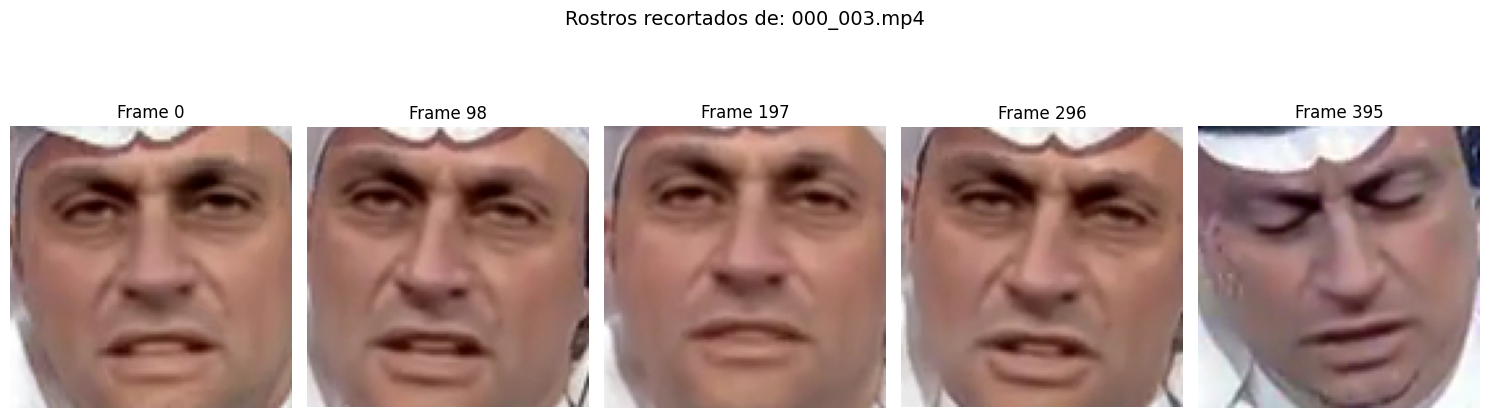

In [16]:
ver_corte("C:/Users/Hermanos/Desktop/Proyecto Deepfake/FaceForensics++_C23/Deepfakes/000_003.mp4")
